In [149]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, scatter, imshow, rcParams
import os, sys
import re, string
from io import StringIO
from glob import glob
import numpy as np, scipy as sp, pandas as pd
from scipy.integrate import cumtrapz
from scipy import signal
from scipy.special import erf, expit
import csv, json
import editdistance as edist
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [65]:
def scat(xy, **kwargs):
    assert xy.shape[1] == 2, 'Must have only two columns'
    plt.scatter(xy[:,0], xy[:,1], **kwargs )

In [6]:
def euler(x):
    return np.exp(x * np.pi * 1j)

ed = edist.eval

In [3]:
basedir = '/media/mike/tera/data/case/Nina_data/2017_Pressure Data'

In [4]:
fns = glob(basedir + '/*.PRS')
fns[:5]

['/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1133_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1073_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1061_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1045_.PRS',
 '/media/mike/tera/data/case/Nina_data/2017_Pressure Data/Case_1105_.PRS']

In [127]:
#%%html
# <iframe src="http://aeksco.github.io/magellan" width=1200 height=1200></iframe>

## Ok, goofy but not so goofy idea: Make an embedding by picking N "Magic strings" and computing Levenstein distance to each

Ideally this basis would be empirical and somewhat orthogonal, but for starters, let's do an inefficient embedding using rando files from my system. 

This can also be done with genericized magic masks (eg all letters, or hex or whatever. Though detecting hex strings should be easy enough). 

Time extractors should get their one suite as well


In [7]:
a = 'banana'
b = 'bahamas'
ed(a, b)

3

In [17]:
s = '0a0c32c9e08cc2ea76a71649de56be6d'
print(len(s))

def is_hexable(st):
    try:
        int(st, 16) # this catches with and without '0x'. I love python. 
        return True
    except ValueError:
        return False
    
    
is_hexable(s), is_hexable(s + '?')

32


(True, False)

In [23]:
magic_strings = ['', 'spam', 'foobar', '123', 'config', 
                'Screenshot from 2016-12-22 20-24-25.png', 
                'IMG_20170101_230202895.jpg',
                '20160514_023202.jpg', 
                'ab.java.programming-20170730-003005.properties',
                'C0_AR0_P1a_J0_PIV_MP(2x16x16_50ov)', 
                #'Case_1027_.PRS',# 
                'bandong06-12',
                'describe.txt',
                'log.txt',
                'log_OpenBCI-RAW-2017-08-10_07-02-24.txt',
                '0a0c32c9e08cc2ea76a71649de56be6d']

print(len(magic_strings))

15


In [43]:
def signorm(x, mu=5, c=1):
    return expit((x-mu) * c)

def soften(x):
    return x**0.5

def lev_vec(st):
    
    result = [len(st)] + [ed(st, tester) for tester in magic_strings]
    return np.array(result)

In [44]:
lev_vec('banana')

array([ 6,  6,  5,  6,  6,  5, 37, 26, 19, 42, 33,  8, 11,  7, 38, 29])

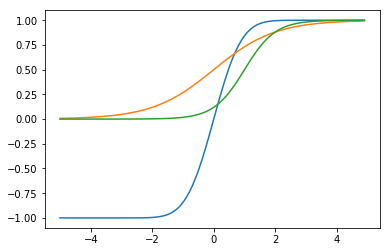

In [35]:
x = np.arange(-5,5, 0.1)
plot(x, erf(x) )
plot(x, expit(x))
plot(x, signorm(x, 1, 2))

In [37]:
signorm(lev_vec('foobaz'))

array([ 0.73105858,  0.5       ,  0.01798621,  0.73105858,  0.5       ,
        1.        ,  1.        ,  0.99999917,  1.        ,  1.        ,
        0.99752738,  0.99752738,  0.73105858,  1.        ,  1.        ])

In [45]:
soften(lev_vec('foobar'))

array([ 2.44948974,  2.44948974,  2.23606798,  0.        ,  2.44948974,
        2.23606798,  6.08276253,  5.09901951,  4.35889894,  6.55743852,
        5.74456265,  3.31662479,  3.31662479,  2.44948974,  6.164414  ,
        5.56776436])

In [94]:
paths = ['/media/mike/tera/data/case/Nina_data/2017_Pressure Data/*',
        '/media/mike/tera/data/stage1/0015ceb851d7251b8f399e39779d1e7d/*',
        '/media/mike/tera/data/chars74k/English/Fnt/Sample001/*', 
        '/home/mike/Pictures/Webcam/*', 
        '/var/log/*']

In [95]:
labels = []
for i, p in enumerate(paths):
    fns = glob(p)
    labels += [i for _ in fns]
    
len(labels), len(fns)

(1506, 92)

In [96]:
xx = [glob(path) for path in paths]
yy = [item for sublist in xx for item in sublist]
yy = [os.path.basename(fn) for fn in (yy)]
len(yy)

1506

In [97]:
vecs = [lev_vec(fn) for fn in yy]
vecs = np.array(vecs)
print(vecs.shape)

(1506, 16)


In [98]:
xembed = PCA(n_components=2).fit_transform(vecs)

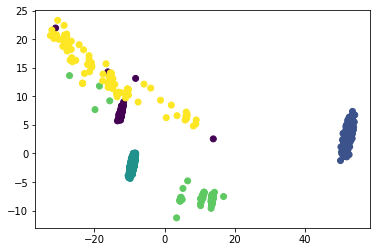

In [99]:
scat(xembed, c=labels)

# :D :D :D DEM CLUSTERS

In [101]:
xembed = TSNE(n_components=2).fit_transform(vecs)

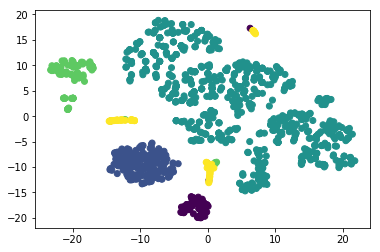

In [102]:
scat(xembed, c=labels)

Let's try something more exotic. Can it work with rando strings?

In [112]:
charset = string.ascii_letters + string.digits + '._-' # posix fully portable
charset

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789._-'

In [117]:
def rando_string(imin=1, imax=32):
    ilen = np.random.randint(imin, imax)
    setsize = len(charset)
    s = ''.join([charset[np.random.randint(0, setsize)] for _ in range(ilen)])
    return s

rando_string()


'9mQLlmvV'

In [143]:
magic_strings = [rando_string() for _ in range(31)]
magic_strings += ['00000.'] # hack for a common type of file ending

In [144]:
labels = []
for i, p in enumerate(paths):
    fns = glob(p)
    labels += [i for _ in fns]
    
xx = [glob(path) for path in paths]
yy = [item for sublist in xx for item in sublist]
yy = [os.path.basename(fn) for fn in (yy)]

vecs = [lev_vec(fn) for fn in yy]
vecs = np.array(vecs)
print(vecs.shape)

(1506, 33)


In [145]:
xembed = PCA(n_components=2).fit_transform(vecs)

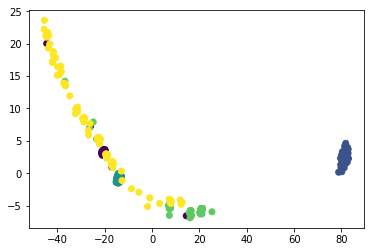

In [146]:
scat(xembed, c=labels)

In [147]:
xembed = TSNE(n_components=2).fit_transform(vecs)

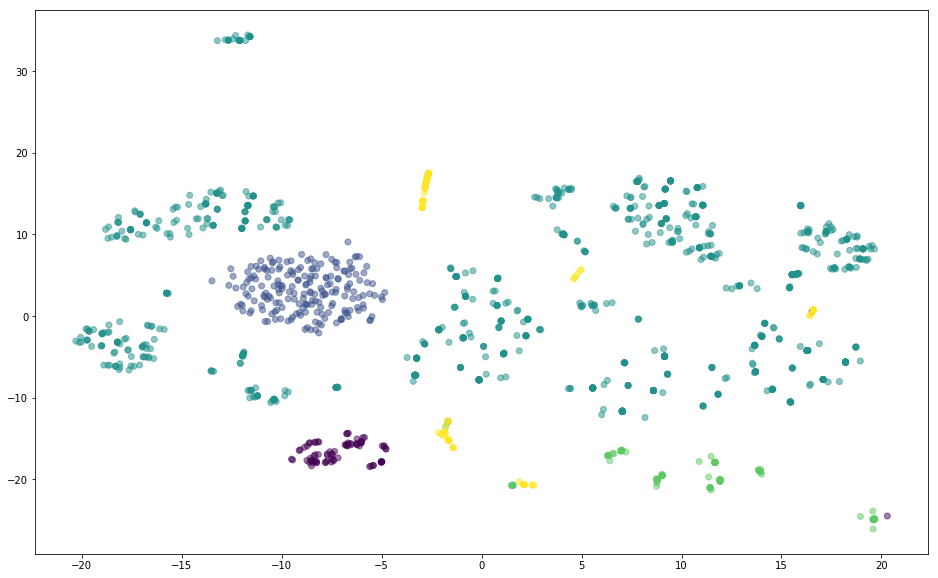

In [198]:
scat(xembed, c=labels, alpha=0.5)

### Ok, so rando strings don't work as well as defined filenames, but it still works PRETTY DAMN WELL. YAY. 

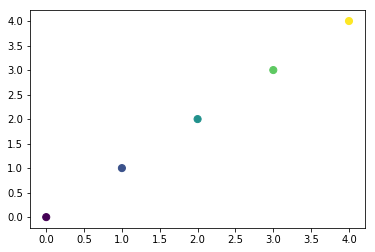

In [142]:
xy = range(max(labels)+1)
scatter(xy, xy, s=50, c=xy)

In [161]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(vecs)

In [162]:
len(kmeans.labels_), max(kmeans.labels_), max(labels)

(1506, 4, 4)

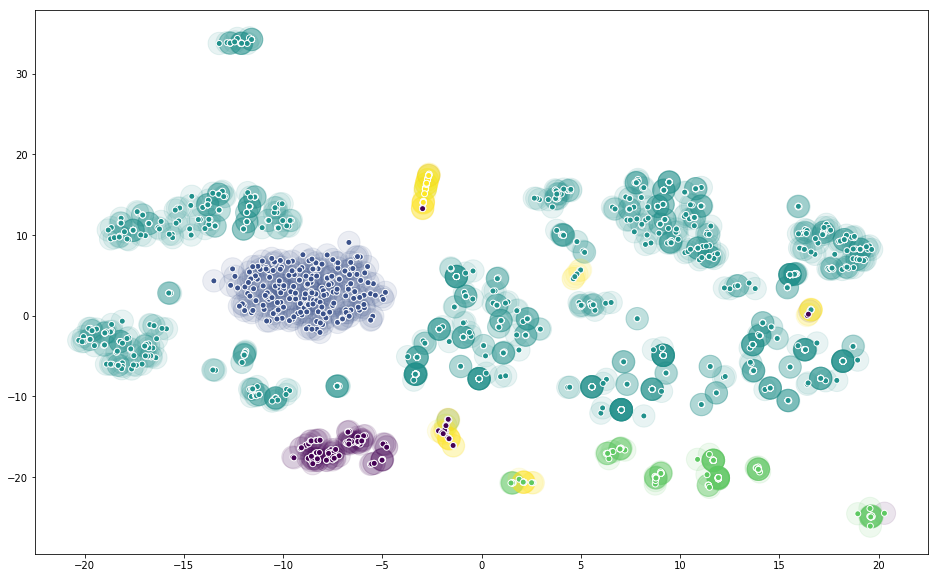

In [199]:
xf = {0:2, 1: 1, 2:3, 3:0, 4:4}
klabels = [xf[i] for i in kmeans.labels_]
rcParams['figure.figsize'] = 16, 10
scat(xembed, c=labels, s=500, alpha=0.1)
scat(xembed, c=klabels, edgecolors='w')

In [175]:
pred = [xf[i] for i in kmeans.predict(vecs)]

In [179]:
acc = np.mean([pred[i] == labels[i] for i in range(len(labels))])
acc

0.95883134130146086

# Holy smokes!

In [184]:
len(yy), len(labels)

(1506, 1506)

In [192]:
df = pd.DataFrame(yy, columns=['name'])
df['label'] = labels
df['pred'] = pred
df.sample(10)

,name,label,pred
189,4db134d300db4c2b7acbfa278c589c17.dcm,1,1
1316,2017-03-03-134727_48.jpg,3,3
884,img001-00711.png,2,2
927,img001-00032.png,2,2
771,img001-00439.png,2,2
263,5b4bab0a56c37c55cf2037713735a029.dcm,1,1
1045,img001-00361.png,2,2
335,img001-00140.png,2,2
161,c7c61278f903affce883fce86cc967c4.dcm,1,1
897,img001-00552.png,2,2


In [197]:
misses = df[df['pred'] != df['label']]
# misses[misses['label'] != 4]
misses

,name,label,pred
19,Case_1003_TESTLORES.PRS,0,3
38,Figs,0,4
1295,orig.jpg,3,4
1333,oversharp.jpg,3,0
1357,soften40.jpg,3,0
1358,too soft.jpg,3,0
1414,uvcdynctrl-udev.log,4,2
1416,apport.log.4.gz,4,2
1417,gpu-manager.log,4,0
1420,alternatives.log.3.gz,4,3


### Not terribly surprising, the most heterogeneous set underperforms. 

Crucially, it fails to get that Case_1003_TESTLORES.PRS is of the Case_0123.PRS set. Other, less statistical logic should be able to handle that, though it points out a critical weakness of this approach, which is that "semantically" the filenames are closer, but not levenstein-closer. 